In [1]:
import uproot
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [62]:
#infile_name = ('/storage/xenon/jacquesp/hermeticTPC/PMT_238_0001.root')
infile_name = ('/srv01/xenon/jacquesp/HermeticTPC/Test2.root')
infile = uproot.open(infile_name)
event_dir=infile['events']
events = infile['events']["events"]

In [63]:
keys = infile.keys()

print(keys)

['G4VERSION_TAG;1', 'events;1', 'events/nbevents;1', 'events/events;7', 'events/events;6', 'G4RUNTIME;1', 'RANDOM_SEED;1']


In [64]:
primaries = infile["events"]["nbevents"]
primaries.value

10000

In [11]:
def read_root_dir_minimal(fn, treename='events', output_type='df', istart=0, istop=1000):
    '''
    Output types can be 'df' for pandas dataframe or 'array' for numpy array.
    '''
    with uproot.open(fn) as f:
        tree = f[f"{treename}"][f"{treename}"]
        branches = ['nsteps', 'xp', 'yp', 'zp', 'creaproc', 'trackid', 'PreStepEnergy', 'etot', 'parentid', 'parenttype', 'xp_pri', 'yp_pri', 'zp_pri', 'ed', 'time']
        data = tree.arrays(branches, filter_name='nsteps', library='np', entry_start = istart, entry_stop=istop)
        
        # Apply selection: NAct > 0
        mask = data['nsteps'] >= 0
        filtered_data = {key: value[mask] for key, value in data.items()}
        
        if output_type == 'df':
            return pd.DataFrame(filtered_data)
        elif output_type == 'array':
            return filtered_data
        else:
            print(f'Warning: output type you specified is {output_type}, not understood, returning numpy array...')
            return filtered_data

In [12]:
row_length = ('nsteps')
scalar_fields = ['etot', 'xp_pri', 'yp_pri', 'zp_pri']
vector_fields = ['xp', 'yp', 'zp', 'PreStepEnergy', 'parentid', 'parenttype', 'ed', 'time', 'creaproc', 'trackid']

def flatten_mc_tree(df, row_length=row_length, vector_fields=vector_fields, scalar_fields=scalar_fields):
    flattened_data = []
    for i, row in df.iterrows():
        # Check lengths just in case
        assert row[row_length] == len(row[vector_fields[0]])

        for j in range(row[row_length]):
            new_row = {}
            new_row['event'] = i
            new_row['particle'] = j

            for key in scalar_fields:
                new_row[key] = row[key]

            for key in vector_fields:
                new_row[key] = row[key][j]

            flattened_data.append(new_row)
   
    df_flattend = pd.DataFrame(flattened_data)
    df_flattend.set_index(['event', 'particle',])  # MultiIndex

    return df_flattend

In [54]:
infile_name = ('/srv01/xenon/jacquesp/HermeticTPC/Test2.root')

In [55]:
raw_df = read_root_dir_minimal(infile_name)
#flat_df= flatten_mc_tree(raw_df)

In [56]:
raw_df

,nsteps,xp,yp,zp,creaproc,trackid,PreStepEnergy,etot,parentid,parenttype,xp_pri,yp_pri,zp_pri,ed,time
0,2495,"[-845.595, 375.90793, -196.82234, -196.82234, ...","[-1235.3049, -1449.0349, -315.55295, -315.5529...","[1339.8042, 917.13495, 841.67126, 841.67126, 8...","(Radioactivation, Radioactivation, Radioactiva...","[221, 232, 1226, 1247, 1246, 1245, 1244, 1243,...","[161.10179, 1912.7816, 186.14954, 0.03321, 0.0...",2087.885498,"[2, 220, 972, 1226, 1226, 1226, 1226, 1226, 12...","(, , , gamma, gamma, gamma, gamma, gamma, gamm...",-188.308884,-322.713654,844.256653,"[0.0, 0.0, 0.32483, 0.03321, 0.04447, 0.04586,...","[7.515781e+16, 7.515781e+16, 7.518872e+16, 7.5..."
1,3243,"[-78.87094, -31.174566, -30.969154, -149.52585...","[-363.54282, -1191.8695, -1195.4368, -340.6259...","[-632.60535, -1677.5, -1682.0, 370.52994, 533....","(Radioactivation, Radioactivation, Radioactiva...","[245, 245, 245, 264, 264, 2120, 2120, 2206, 22...","[122.28518, 122.28518, 122.28518, 1660.442, 16...",2742.918701,"[2, 2, 2, 244, 244, 1652, 1652, 2119, 2119, 21...","(, , , , , , , , , , , e-, e-, e-, e-, e-, e-,...",-120.155365,353.429901,271.821533,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.6480904e+17, 2.6480904e+17, 2.6480904e+17, ..."
2,2372,"[116.676, -50.390697, 43.225746, -446.73608, 1...","[-353.22897, -1496.1516, 369.48007, 547.7822, ...","[882.03735, 420.42972, 1204.6024, 1365.0, 1365...","(Radioactivation, Radioactivation, Radioactiva...","[190, 190, 194, 194, 1885, 1917, 1917, 2003, 2...","[176.34065, 176.34065, 2204.0278, 2204.0278, 9...",2204.079102,"[2, 2, 189, 189, 1435, 1884, 1884, 1916, 1916,...","(, , , , , , , , , gamma, gamma, gamma, gamma,...",213.272430,307.598358,1148.934570,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.103...","[6.690863e+17, 6.690863e+17, 6.690863e+17, 6.6..."
3,139,"[-1404.6365, -343.92615, -343.92615, -343.9261...","[-517.6923, 265.0554, 265.0554, 265.0554, 265....","[738.67487, -1681.122, -1681.122, -1681.122, -...","(Radioactivation, Radioactivation, phot, phot,...","[210, 218, 232, 231, 230, 229, 228, 227, 226, ...","[59.75747, 92.79998, 0.03321, 0.04653, 0.02056...",92.799973,"[2, 209, 218, 218, 218, 218, 218, 218, 218, 21...","(, , gamma, gamma, gamma, gamma, gamma, gamma,...",-344.223480,263.984436,-1679.923462,"[0.0, 0.2712, 0.03321, 0.04653, 0.02056, 0.033...","[6691921400000000.0, 6691921400000000.0, 66919..."
4,1602,"[1439.3422, -103.80876, -706.45636, 158.51912,...","[411.4648, -357.22226, -1319.8214, 336.53482, ...","[982.1755, 693.3514, 1287.1648, 536.2328, 1365...","(Radioactivation, Radioactivation, Radioactiva...","[205, 221, 221, 1881, 1881, 2043, 2227, 2227, ...","[151.13586, 2127.458, 2127.458, 615.8922, 615....",1489.954590,"[2, 204, 204, 1439, 1439, 1893, 2042, 2042, 20...","(, , , , , , e-, e-, e-, e-, e-, e-, e-, e-, e...",276.553345,250.323914,318.564972,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.174...","[1.4922051e+17, 1.4922051e+17, 1.4922051e+17, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2472,"[-1294.2339, 357.27832, 1385.433, -1457.7063, ...","[-752.3083, 103.615654, 567.08417, -340.7366, ...","[316.4649, 214.11342, -554.72577, 170.66647, 6...","(Radioactivation, Radioactivation, Radioactiva...","[214, 273, 273, 2007, 2026, 2034, 2033, 2032, ...","[55.492905, 2169.1797, 2169.1797, 600.41943, 3...",2199.370850,"[189, 225, 225, 1552, 2006, 2026, 2026, 2026, ...","(, e-, e-, , gamma, e-, e-, e-, e-, e-, e-, e-...",-316.229462,-199.986206,717.752808,"[0.0, 0.0, 0.0, 0.0, 0.12836, 0.04447, 0.02262...","[3.723076e+17, 3.723076e+17, 3.723076e+17, 3.7..."
996,333,"[1471.267, 93.85716, 93.85716, 93.85716, 93.85...","[276.37405, 381.40454, 381.40454, 381.40454, 3...","[531.5425, 1357.1041, 1357.1041, 1357.1041, 13...","(Radioactivation, Radioactivation, phot, phot,...","[218, 2104, 2121, 2120, 2119, 2118, 2117, 2116...","[85.93868, 248.34111, 0.04447, 0.04586, 0.0124...",248.341034,"[190, 2018, 2104, 2104, 2104, 2104, 2104, 2104...","(anti_nu_e

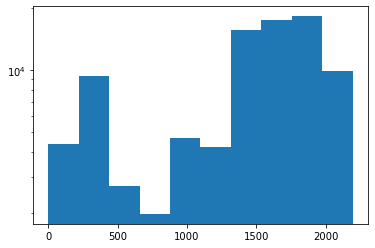

In [43]:
plt.hist(flat_df['etot'])
plt.yscale('log')

In [36]:
def process_chunk(df):
    xpos = []
    ypos = []
    zpos = []
    time_diff = []
    multis = []
    escatter=[]
    
    events = np.unique(df['event'])
    for event in events[:]:
        mask = ((df['event']==event) & (df['ed']>0))
        df_event = df[mask]
        xpos.append(np.average(df_event['xp'], weights = df_event['ed']))
        ypos.append(np.average(df_event['yp'], weights = df_event['ed']))
        zpos.append(np.average(df_event['zp'], weights = df_event['ed']))
        time_diff.append(np.max(df_event['time'])-np.min(df_event['time']))
        escatter.append(np.sum(df_event['ed']))
        multis.append(np.max(df_event['zp'])-np.min(df_event['zp'])>10)
        
    df_scatters = pd.DataFrame({'xpos':xpos,
                                'ypos':ypos,
                                'zpos':zpos,
                                'escatter':escatter,
                                'time': time_diff,
                                'multis':multis})
    return df_scatters

In [37]:
def df_process_file(infile_name, treename='events', chunksize=1000, bstop=False, istop=-1):
    infile = uproot.open(infile_name)
    tree = infile[f"{treename}"][f"{treename}"]
    primaries = tree.arrays('etot')
    primaries = len(primaries)
    df_scatters =[]
    df_raw_all = []
    print(np.ceil(primaries/chunksize))
    for i_chunk in tqdm(range(int(np.ceil(primaries/chunksize)))):
        if bstop and (chunksize*i_chunk)>istop:
            break
        df_raw = read_root_dir_minimal(infile_name, treename, istart=chunksize*i_chunk, istop=chunksize*(i_chunk+1))
        df_flat = flatten_mc_tree(df_raw)
        df_flat = df_flat[df_flat['etot']>0]
        df_scatters.append(process_chunk(df_flat))
        df_raw_all.append(df_raw)
    df_scatters = pd.concat(df_scatters)
    df_raw_all =  pd.concat(df_raw_all)
    return df_scatters, df_raw_all, df_flat

In [68]:
iso_vol_df, raw_dfs, df_flat = df_process_file('/srv01/xenon/jacquesp/HermeticTPC/Test2.root',
                                      treename='events', chunksize =100, bstop=True, istop =10000)

100.0


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [45:57<00:00, 27.57s/it]


In [69]:
len(iso_vol_df)

8753

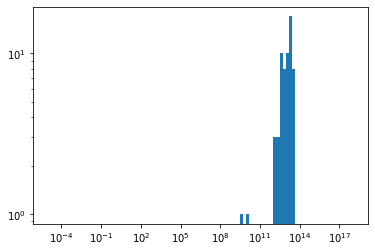

In [81]:
plt.hist(iso_vol_df['time'], bins = np.logspace(-5, 18, 101))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [76]:
iso_vol_df, raw_dfs, df_flat = df_process_file('/storage/xenon/jacquesp/hermeticTPC/PMT_U238_0008.root',
                                      treename='events', chunksize =100, bstop=True, istop =10000)

1946.0


  5%|█████████▎                                                                                                                                                                         | 101/1946 [32:28<9:53:07, 19.29s/it]


In [79]:
len(iso_vol_df)

5600

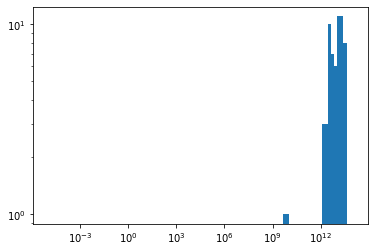

In [80]:
plt.hist(iso_vol_df['time'], bins = np.logspace(-5, 14, 101))
plt.yscale('log')
plt.xscale('log')
plt.show()

### Check Geant4 Output files

In [10]:
import glob
import os
import re
file_prefix = ''
all_dfs = []
all_raw_dfs=[]
key='Cryostat'
isotope='Co60'
# Search for all files matching the pattern for this key + isotope
file_pattern = f'/storage/xenon/jacquesp/hermeticTPC/{key}_{isotope}_*.root'
matched_files = sorted(glob.glob(file_pattern))

for filepath in matched_files:
    print(filepath)
    #filename = os.path.basename(filepath)

    # Use regex to extract serial number (handles zero-padding)
    #match = re.match(rf'{re.escape(file_prefix)}{re.escape(key)}_{re.escape(isotope)}_(\d+)\.npy', filename)
    #if match:
    #    serial_num = int(match.group(1))
    #    if serial_num > max_index:
    #        continue

    # Load and collect DataFrame
    #try:
    iso_vol_df, raw_dfs = df_process_file(filepath, treename='events', chunksize =100, bstop=True, istop =500)
    #except:
    #print(filepath)
    #iso_vol_df = pd.DataFrame(iso_vol_df, columns=['xpos', 'ypos', 'zpos', 'escatter', 'multis'])
    all_dfs.append(iso_vol_df)
    all_raw_dfs.append(raw_dfs)

In [11]:
  all_raw_dfs

[]

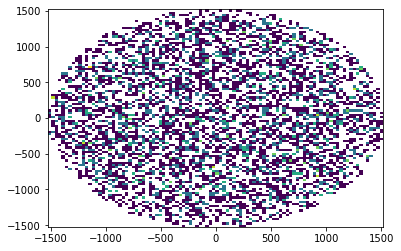

In [30]:
plt.hist2d(flat_df_raw['xp_pri'], flat_df_raw['yp_pri'],  bins=[100, 100], norm=LogNorm())
plt.show()

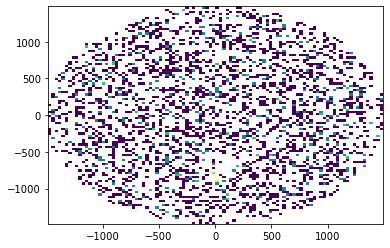

In [31]:
plt.hist2d(test_df['xpos'], test_df['ypos'],  bins=[100, 100], norm=LogNorm())
plt.show()

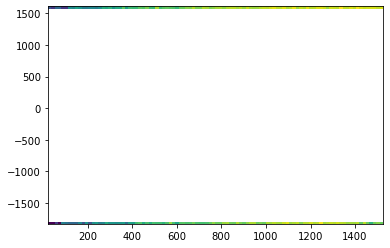

In [32]:
plt.hist2d(np.sqrt(flat_df_raw['xp_pri']**2+flat_df_raw['yp_pri']**2), flat_df_raw['zp_pri'],  bins=[100, 100], norm=LogNorm())
plt.show()

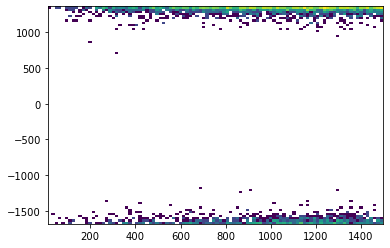

In [33]:
plt.hist2d(np.sqrt(test_df['xpos']**2+test_df['ypos']**2), test_df['zpos'],  bins=[100, 100], norm=LogNorm())
plt.show()

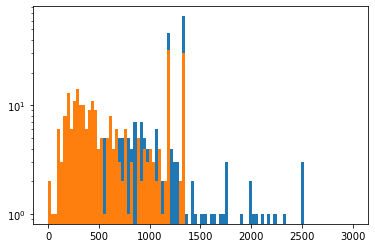

In [39]:
mask = (test_df['multis']==True)
plt.hist(test_df[mask]['escatter'], bins =np.linspace(0, 3000, 101), label = 'Multiscatter')
mask = (test_df['multis']==False)
plt.hist(test_df[mask]['escatter'], bins =np.linspace(0, 3000, 101), label = 'Singlescatter')
plt.yscale('log')
plt.show()

### Processed Background Files

In [69]:
test_df = np.load('analysis/test.npy', allow_pickle=True)
test_df = pd.DataFrame(test_df, columns=['xpos', 'ypos', 'zpos', 'escatter', 'multis'])

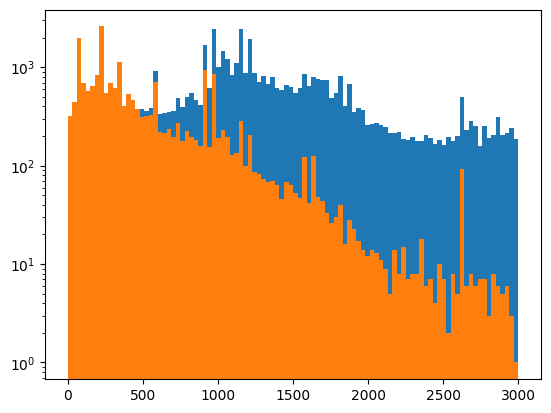

In [70]:
mask = (test_df['multis']==True)
plt.hist(test_df[mask]['escatter'], bins =np.linspace(0, 3000, 101), label = 'Multiscatter')
mask = (test_df['multis']==False)
plt.hist(test_df[mask]['escatter'], bins =np.linspace(0, 3000, 101), label = 'Singlescatter')
plt.yscale('log')
plt.show()

In [72]:
def energy_res(energy, a_res, b_res):
    resolution = a_res*np.sqrt(energy.values)+b_res*10**-3*energy
    e_smeared = np.random.normal(energy,resolution)
    return e_smeared

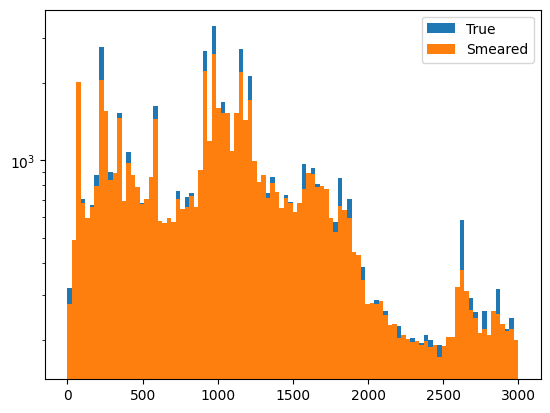

In [73]:
plt.hist(test_df['escatter'], bins =np.linspace(0, 3000, 101), label = 'True')
plt.hist(energy_res(test_df['escatter'].astype(float), 0.317, 1.7), bins =np.linspace(0, 3000, 101), label = 'Smeared')
plt.legend()
plt.yscale('log')
plt.show()

### Process All Background Runs

In [71]:
#in uBq/unit
act_dict = {'PMT': {'Co60': 700, 'U238': 8000, 'Th232': 500},
            'Sapphire': {'Co60': 0.0, 'U238': 90, 'Th232': 60},
            #'PTFE': {'Co60': 50.0, 'U238': 150, 'Th232':50},
            'Cryostat': {'Co60': 3000, 'U238': 4000, 'Th232':2000},
           }

mass_dict = {'PMT': 2240, 'Sapphire': 45, 'PTFE':200, 'Cryostat': 4000}

def energy_res(energy, a_res, b_res):
    resolution = a_res*np.sqrt(energy.values)+b_res*10**-3*energy
    e_smeared = np.random.normal(energy,resolution)
    return e_smeared
    
max_index = 1000

In [72]:
scale_dict = {}
num_primaries_perfile = {'PMT': 200000, 'PTFE': 250000, 'Cryostat': 250000, 'Sapphire': 250000}
for key, volume in act_dict.items():
    volume_scale = {}
    for act_key, activity in volume.items(): 
        #print(act_key)
        if (act_dict[key][act_key])>0:
            scale_factor = num_primaries_perfile[key]/(mass_dict[key]*act_dict[key][act_key]*10e-6)
        else:
            scale_factor=0
        volume_scale[act_key] = scale_factor
        #print(scale_factor)
    scale_dict[key] = volume_scale

In [73]:
from multihist import Histdd


In [74]:
import glob
import os
import re

Assumed LXe Mass: 3.856795856133594 t
U238 PMT 399 12288
Assumed LXe Mass: 3.856795856133594 t
U238 Sapphire 97 31045
Assumed LXe Mass: 3.856795856133594 t
U238 Cryostat 96 37
Assumed LXe Mass: 3.856795856133594 t
Th232 PMT 389 17458
Assumed LXe Mass: 3.856795856133594 t
Th232 Sapphire 93 2555
Assumed LXe Mass: 3.856795856133594 t
Th232 Cryostat 100 193


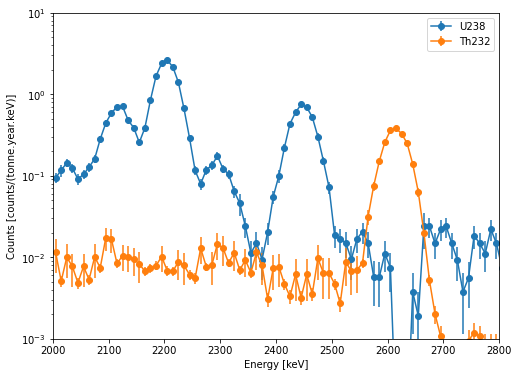

In [76]:
file_prefix = ''

lxe_density = 2.91
year = 3.154e7  #seconds
energy_binning = np.linspace(2000, 3000, 101)

fig, ax = plt.subplots(figsize=(8, 6))
for isotope in ['U238', 'Th232']:
    background_hist = Histdd(bins=[energy_binning])
    binwidth = background_hist.bin_centers(0)[1]-background_hist.bin_centers(0)[0]
    errors=np.zeros_like(background_hist.bin_centers(0))
    for key, volume in act_dict.items():
        all_dfs = []
    
        # Search for all files matching the pattern for this key + isotope
        file_pattern = f'/storage/xenon/jacquesp/hermeticTPC/{key}_{isotope}_*.npy'
        matched_files = sorted(glob.glob(file_pattern))
        
        for filepath in matched_files:
            filename = os.path.basename(filepath)
    
            # Use regex to extract serial number (handles zero-padding)
            match = re.match(rf'{re.escape(file_prefix)}{re.escape(key)}_{re.escape(isotope)}_(\d+)\.npy', filename)
            if match:
                serial_num = int(match.group(1))
                if serial_num > max_index:
                    continue
    
                # Load and collect DataFrame
                #try:
                iso_vol_df = np.load(filepath, allow_pickle=True)
                #except:
                    #print(filepath)
                iso_vol_df = pd.DataFrame(iso_vol_df, columns=['xpos', 'ypos', 'zpos', 'escatter', 'multis'])
                all_dfs.append(iso_vol_df)
                
            else:
                print(f"Skipping file (name format doesn't match): {filename}")
    
        # Concatenate all matching DataFrames
        if not all_dfs:
            print(f"No files found for key {key}, isotope {isotope}")
            continue

        file_loaded_counter = len(all_dfs)
        full_iso_vol_df = pd.concat(all_dfs, ignore_index=True)
    
        # Apply masking
        radius_cut = 375
        z_max = 1350
        z_min = -1650
        
        mask = (full_iso_vol_df['multis'] == False)
        mask &= (full_iso_vol_df['xpos'] ** 2 + full_iso_vol_df['ypos'] ** 2 < radius_cut ** 2)
        mask &= (full_iso_vol_df['zpos'] < z_max) & (full_iso_vol_df['zpos'] > z_min)
        mask &= (full_iso_vol_df['escatter'] > 2000) & (full_iso_vol_df['escatter'] < 3000)
    
        height =(z_max-z_min)
        volume = height/10*np.pi*(radius_cut/10)**2
        mass_fv = (volume*lxe_density)/1e6
        print(f"Assumed LXe Mass: {mass_fv} t" )
        
        # Histogram calculation
        temp_hist = Histdd(
            energy_res(full_iso_vol_df[mask]['escatter'].astype(float), 0.317, 1.7),
            bins=[energy_binning],
            )

        temp_errors = np.sqrt(temp_hist.histogram)
    
        if scale_dict[key][isotope] > 0:
            print(isotope, key, file_loaded_counter, len(full_iso_vol_df[mask]['escatter']))
            background_hist.histogram += (
                (temp_hist.histogram / (1000 * scale_dict[key][isotope]* file_loaded_counter  * binwidth * mass_fv) * year ))
            errors += (temp_errors * (1 / (1000 * scale_dict[key][isotope]* file_loaded_counter  * binwidth * mass_fv) * year ))
    plt.errorbar(background_hist.bin_centers(0), background_hist.histogram, yerr = errors, marker = "o", label = isotope)
    #plt.yscale('log')

plt.legend()
plt.ylabel('Counts [counts/(tonne.year.keV)]')
plt.xlabel('Energy [keV]')
plt.ylim(0.001, 10)
plt.xlim(2000, 2800)
plt.yscale('log')
plt.savefig("Full_5t_log.png", dpi=300)
plt.show()


Assumed LXe Mass: 2.883740546060186 t
U238 PMT 399 350
Assumed LXe Mass: 2.883740546060186 t
U238 Sapphire 97 8402
Assumed LXe Mass: 2.883740546060186 t
U238 Cryostat 96 2
Assumed LXe Mass: 2.883740546060186 t
Th232 PMT 389 647
Assumed LXe Mass: 2.883740546060186 t
Th232 Sapphire 93 239
Assumed LXe Mass: 2.883740546060186 t
Th232 Cryostat 100 4


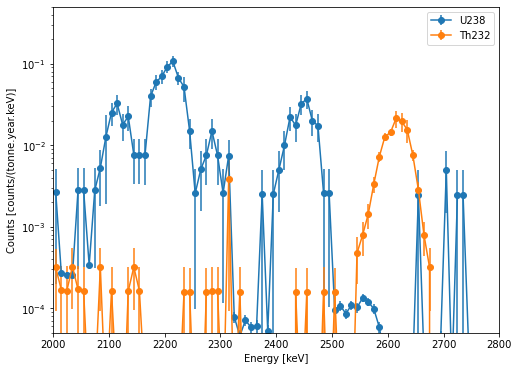

In [80]:
file_prefix = ''

lxe_density = 2.91
year = 3.154e7  #seconds
energy_binning = np.linspace(2000, 3000, 101)

fig, ax = plt.subplots(figsize=(8, 6))
for isotope in ['U238', 'Th232']:
    background_hist = Histdd(bins=[energy_binning])
    binwidth = background_hist.bin_centers(0)[1]-background_hist.bin_centers(0)[0]
    errors=np.zeros_like(background_hist.bin_centers(0))
    for key, volume in act_dict.items():
        all_dfs = []
    
        # Search for all files matching the pattern for this key + isotope
        file_pattern = f'/storage/xenon/jacquesp/hermeticTPC/{key}_{isotope}_*.npy'
        matched_files = sorted(glob.glob(file_pattern))
        
        for filepath in matched_files:
            filename = os.path.basename(filepath)
    
            # Use regex to extract serial number (handles zero-padding)
            match = re.match(rf'{re.escape(file_prefix)}{re.escape(key)}_{re.escape(isotope)}_(\d+)\.npy', filename)
            if match:
                serial_num = int(match.group(1))
                if serial_num > max_index:
                    continue
    
                # Load and collect DataFrame
                #try:
                iso_vol_df = np.load(filepath, allow_pickle=True)
                #except:
                    #print(filepath)
                iso_vol_df = pd.DataFrame(iso_vol_df, columns=['xpos', 'ypos', 'zpos', 'escatter', 'multis'])
                all_dfs.append(iso_vol_df)
                
            else:
                print(f"Skipping file (name format doesn't match): {filename}")
    
        # Concatenate all matching DataFrames
        if not all_dfs:
            print(f"No files found for key {key}, isotope {isotope}")
            continue

        file_loaded_counter = len(all_dfs)
        full_iso_vol_df = pd.concat(all_dfs, ignore_index=True)
    
        # Apply masking
        radius_cut = 350
        z_max = 1125
        z_min = -1450
        
        mask = (full_iso_vol_df['multis'] == False)
        mask &= (full_iso_vol_df['xpos'] ** 2 + full_iso_vol_df['ypos'] ** 2 < radius_cut ** 2)
        mask &= (full_iso_vol_df['zpos'] < z_max) & (full_iso_vol_df['zpos'] > z_min)
        mask &= (full_iso_vol_df['escatter'] > 2000) & (full_iso_vol_df['escatter'] < 3000)
    
        height =(z_max-z_min)
        volume = height/10*np.pi*(radius_cut/10)**2
        mass_fv = (volume*lxe_density)/1e6
        print(f"Assumed LXe Mass: {mass_fv} t" )
        
        # Histogram calculation
        temp_hist = Histdd(
            energy_res(full_iso_vol_df[mask]['escatter'].astype(float), 0.317, 1.7),
            bins=[energy_binning],
            )

        temp_errors = np.sqrt(temp_hist.histogram)
    
        if scale_dict[key][isotope] > 0:
            print(isotope, key, file_loaded_counter, len(full_iso_vol_df[mask]['escatter']))
            background_hist.histogram += (
                (temp_hist.histogram / (1000 * scale_dict[key][isotope]* file_loaded_counter  * binwidth * mass_fv) * year ))
            errors += (temp_errors * (1 / (1000 * scale_dict[key][isotope]* file_loaded_counter  * binwidth * mass_fv) * year ))
    plt.errorbar(background_hist.bin_centers(0), background_hist.histogram, yerr = errors, marker = "o", label = isotope)
    #plt.yscale('log')

plt.legend()
plt.ylabel('Counts [counts/(tonne.year.keV)]')
plt.xlabel('Energy [keV]')
plt.ylim(0.00005, 0.5)
plt.xlim(2000, 2800)
plt.yscale('log')
plt.savefig("FV_3t_log.png", dpi=300)
plt.show()


In [50]:
iso_vol_df = np.load('/storage/xenon/jacquesp/hermeticTPC/PMT_Th232_0001.npy', allow_pickle=True)
iso_vol_df = pd.DataFrame(iso_vol_df, columns=['xpos', 'ypos', 'zpos', 'escatter', 'multis'])
iso_vol_df = iso_vol_df[iso_vol_df['multis']==False]

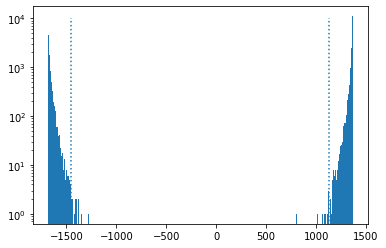

In [51]:
plt.hist( iso_vol_df['zpos'],  bins=1000)
plt.vlines([-1450, 1125], ymin = 0, ymax = 1e4, linestyle = ':')
plt.yscale('log')
plt.show()